# k-Nearest Neighbors

K-nearest neighbors (KNN) is a type of supervised learning algorithm which is used for both regression and classification purposes, but mostly it is used for the later. Given a dataset with different classes, KNN tries to predict the correct class of test data by calculating the distance between the test data and all the training points. It then selects the k points which are closest to the test data.  Once the points are selected, the algorithm calculates the probability (in case of classification) of the test point belonging to the classes of the k training points and the class with the highest probability is selected. In the case of a regression problem, the predicted value is the mean of the k selected training points.


Let’s understand this with an illustration:


1)	Given a training dataset as given below. We have a new test data that we need to assign to one of the two classes.

<img src="1.png" width="">
                                      

2)	Now, the k-NN algorithm calculates the distance between the test data and the given training data.

<img src="2.png" width="">

                                                        
3)	After calculating the distance, it will select the k training points which are nearest to the test data. Let’s assume the value of k is 3 for our example.

<img src="3.png" width="">                                            


4)	Now, 3 nearest neighbors are selected, as shown in the figure above. Let’s see in which class our test data will be assigned :

Number of Green class values = 2
Number of Red class values = 1
Probability(Green) = 2/3
Probability(Red) = 1/3

Since the probability for Green class is higher than Red, the k-NN algorithm will assign the test data to the Green class.

Similarly, if this were the case of a regression problem, the predicted value for the test data will simply be the mean of all the 3 nearest values.

This is the basic working algorithm for k-NN. Let’s understand how the distance is calculated :

### Euclidean Distance:

It is the most commonly used method to calculate the distance between two points.
The Euclidean distance between two points ‘p(p1,p2)’ and ‘q(q1,q2)’ is calculated  as :

<img src="4.png" width="">       image source : Wikipedia

<img src="5.png" width="">

                                          
Similarly,for n-dimensional space, the Euclidean distance is given as :

<img src="6.png" width="">


### Lazy Learners

k-NN algorithms are often termed as Lazy learners. Let’s understand why is that. Most of the algorithms like Bayesian classification, logistic regression, SVM etc., are called Eager learners. These algorithms generalize over the training set before receiving the test data i.e. they create a model based on the training data before receiving the test data and then do the prediction/classification on the test data.
But this is not the case with the k-NN algorithm. It doesn’t create a generalized model for the training set but waits for the test data. Once test data is provided then only it starts generalizing the training data to classify the test data.  So, a lazy learner just stores the training data and waits for the test set. Such algorithms work less while training and more while classifying a given test dataset.




### Pros and Cons of KNN Algorithm

Pros:
*	It can be used for both regression and classification problems.
*	It is very simple and easy to implement.
*	Mathematics behind the algorithm is easy to understand.
*	There is no need to create model or do hyperparameter tuning.
*   KNN doesn't make any assumption for the distribution of the given data.
*   There is not much time cost in training phase.

Cons:
*	Finding the optimum value of ‘k’
*	It takes a lot of time to compute the distance between each test sample and all training samples.
*	Since the model is not saved beforehand in this algorithm (lazy learner), so every time one predicts a test value, it follows the same steps again and again.
*	Since, we need to store the whole training set for every test set, it requires a lot of space.
*	It is not suitable for high dimensional data.
*   Expensive in testing phase




### Applications of KNN Algorithm

- Recommender systems: recommending ads to display to a user (YouTube) or recommending products (Amazon ), or recommending media to consume.  For example, if you buy a smartphone from Amazon, it recommends a mobile cover or earphones to go with it.

- KNN used in politics for classifying a potential voter as a “will vote” or “will not vote” candidate.

- KNN algorithms can be used to find an individual’s credit rating by comparing with the persons having similar traits.

- Other advanced applications of KNN include video recognition, image recognition, and handwriting detection.

### Python implementation

In [7]:
# Business Case:-To predict whether a person will have diabetes or not.

In [8]:
# import all required libraries

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor # For regression task
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [9]:
# Reading the data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [10]:
# Domain analysis
# EDA and get the insights from data.


In [11]:
# Get the statistical information of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [12]:
# Data Preprocessing

In [13]:
# Cheking for null values
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


It seems that there are no missing values in our data. Great, let's see the distribution of data:

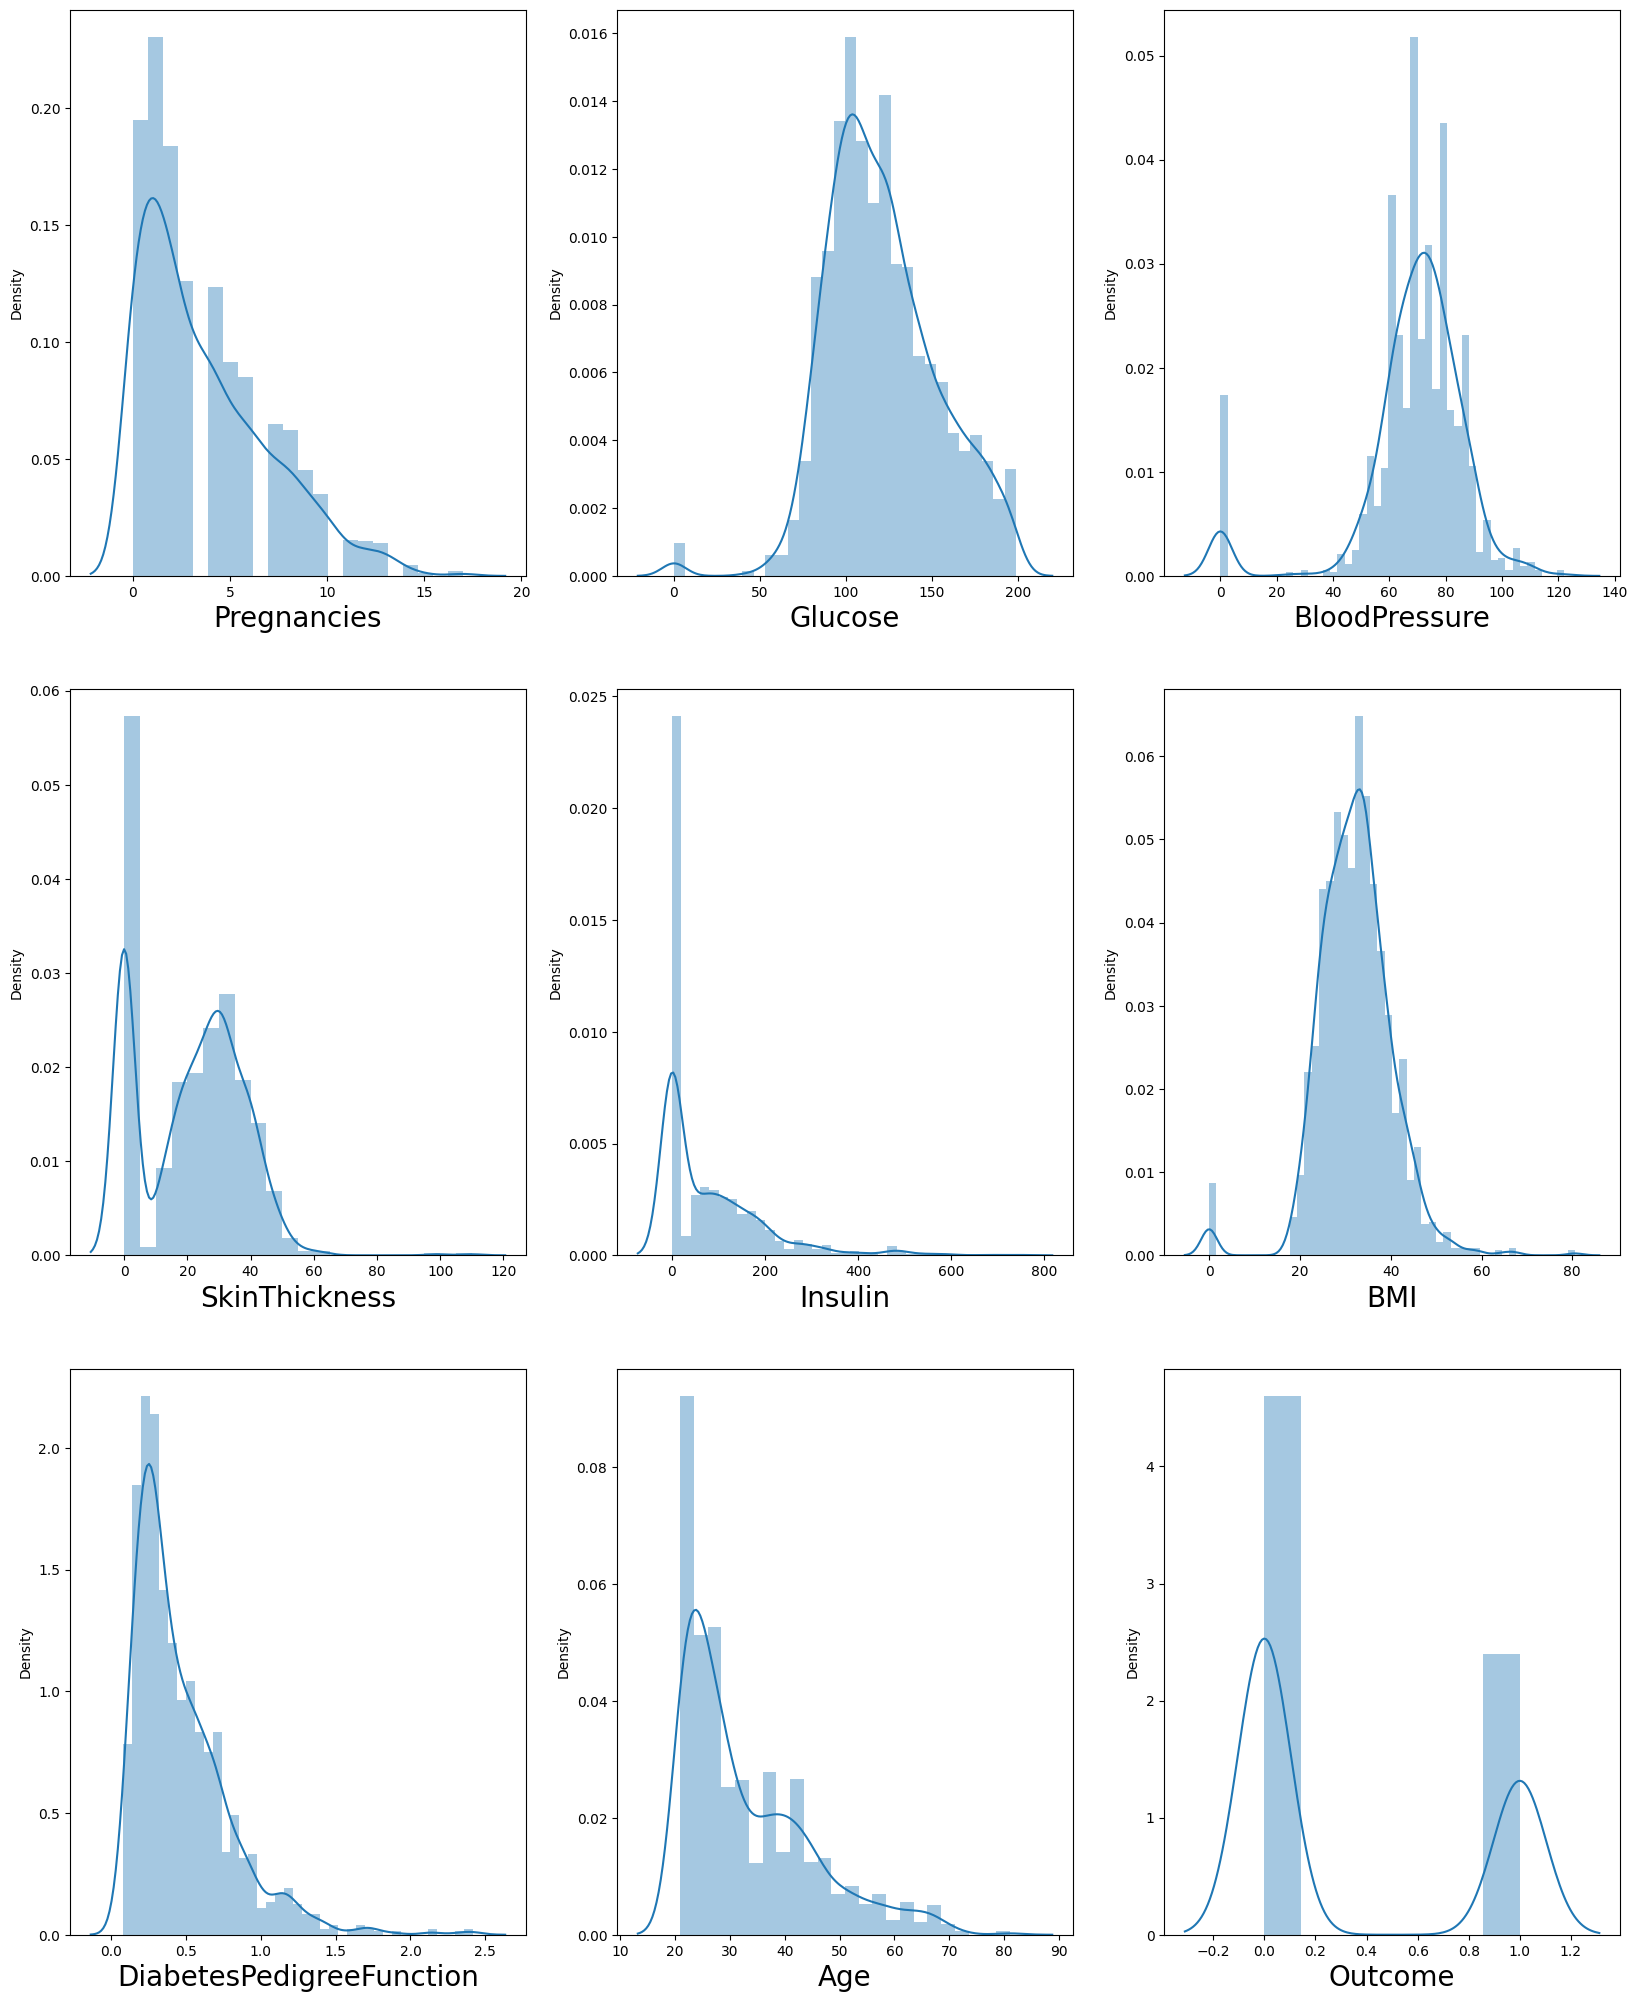

In [14]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Insulin, skin thickness, BMI and Blood Pressure which have value as 0. You can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.


In [15]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].median())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].median())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].median())

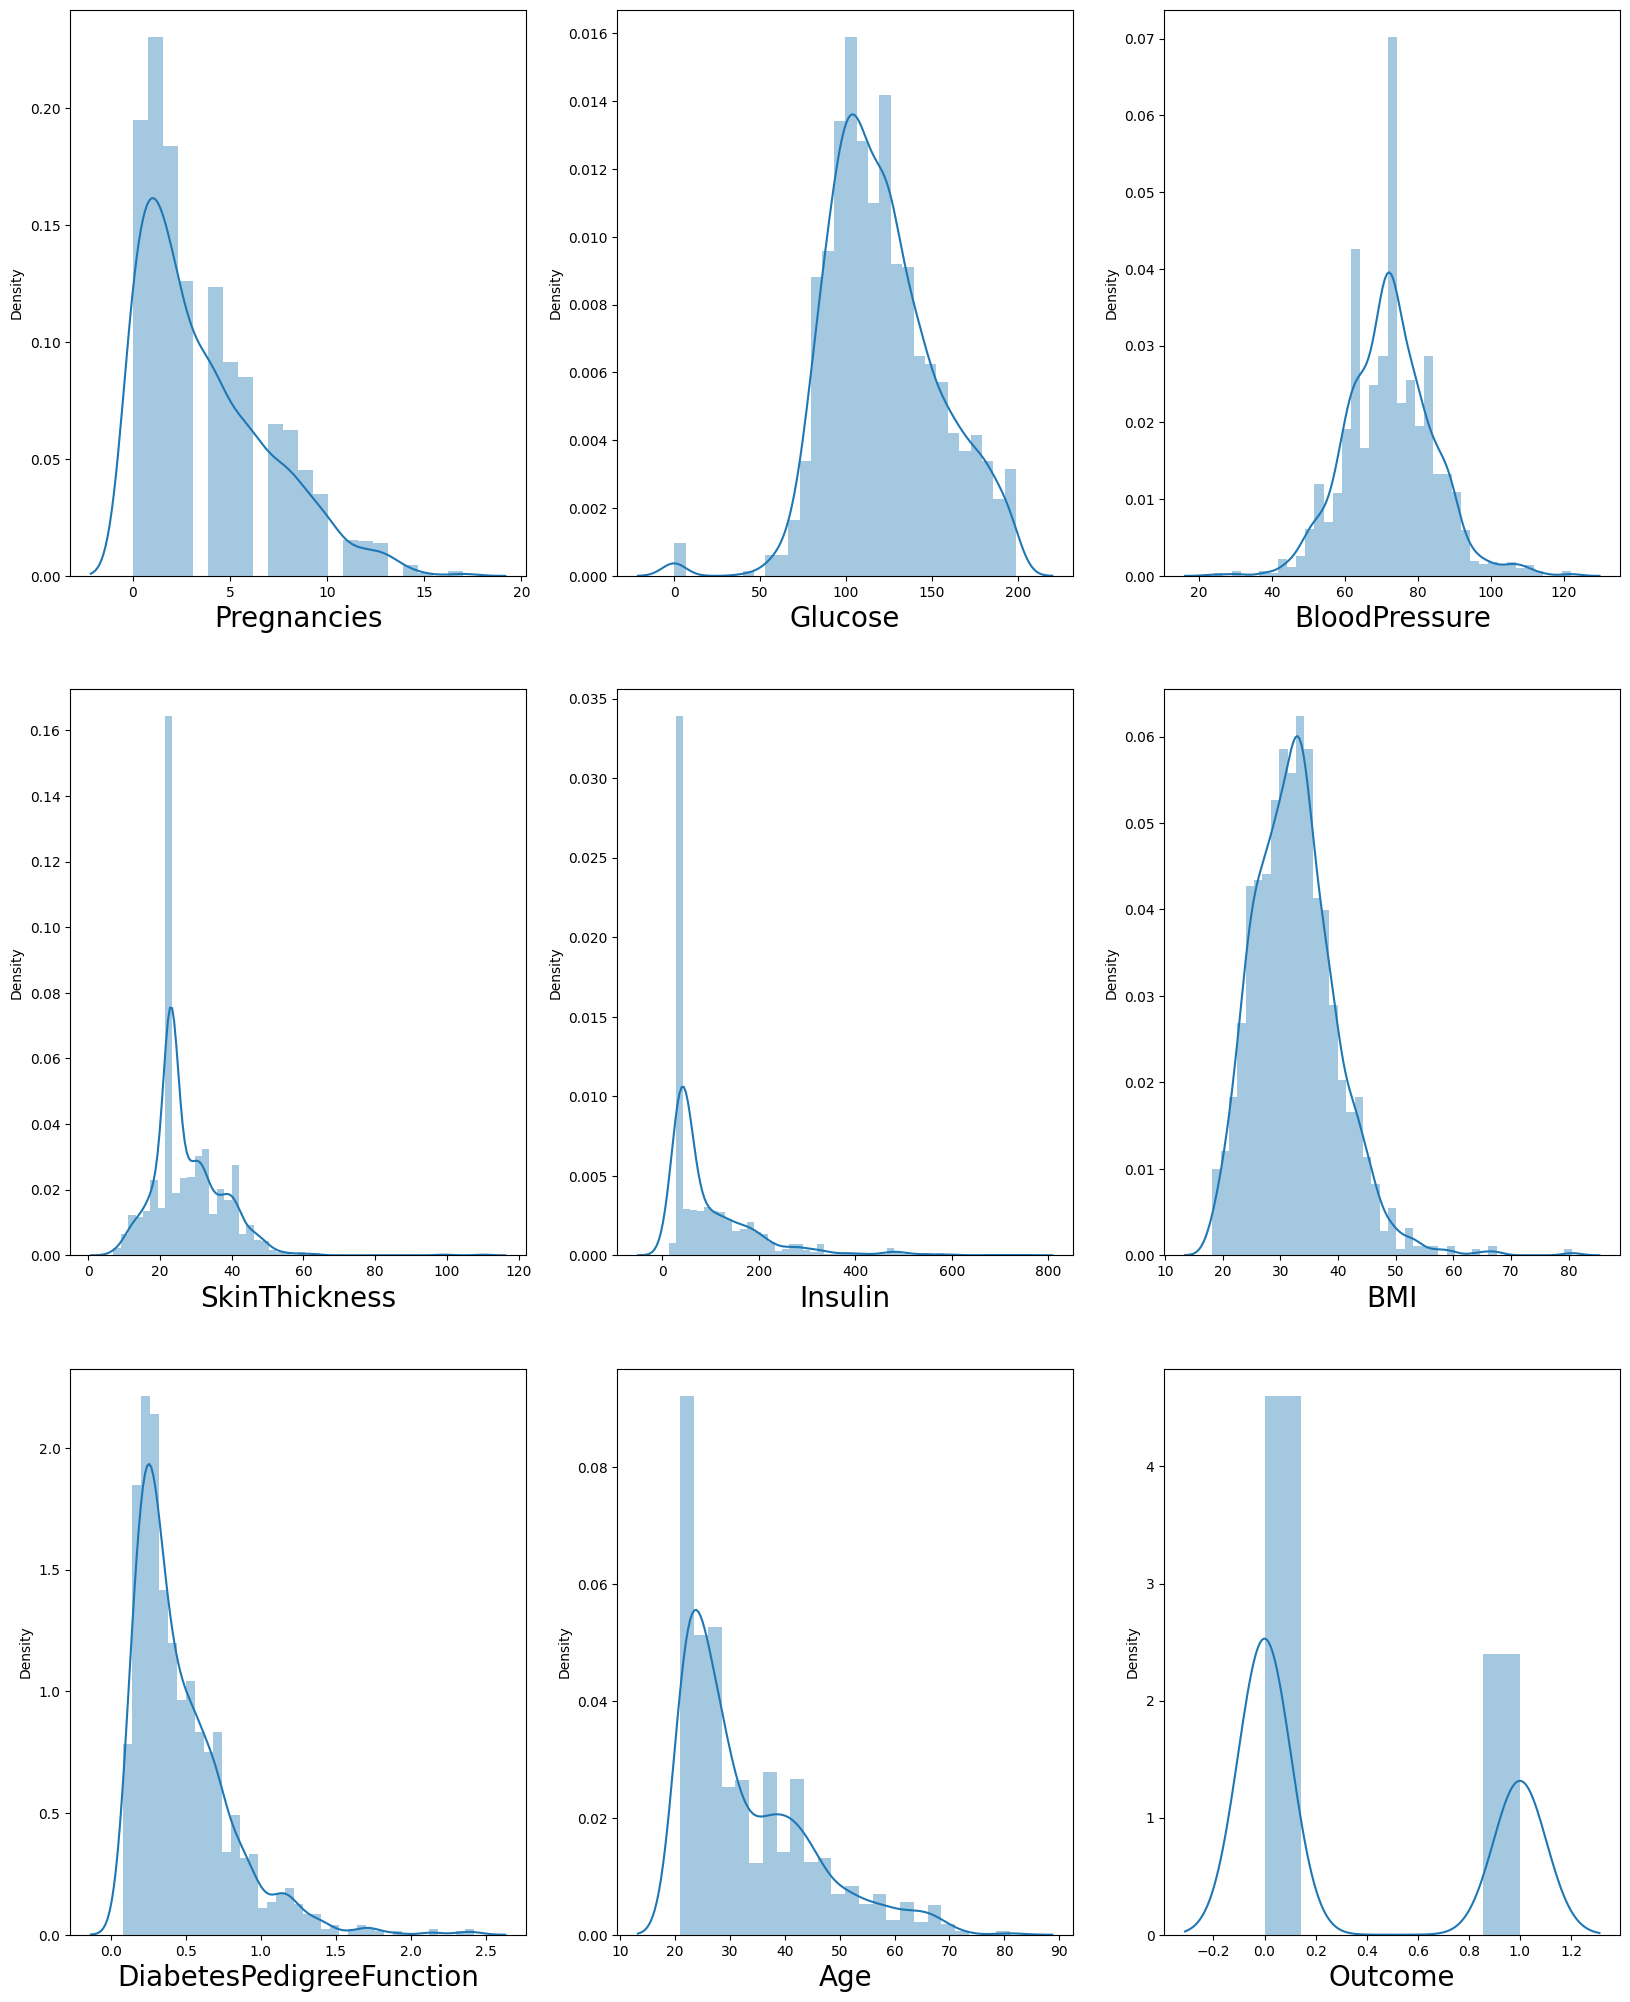

In [16]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Model Creation

In [17]:
### Split X and Y
X = data.drop(columns = ['Outcome']) # Independent variables
y = data['Outcome'] # Dependent or target varaible.

In [18]:
## scaling the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [19]:
## splitting the training and testing data
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,random_state=42)

In [20]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [21]:
error_rate

[np.float64(0.036),
 np.float64(0.118),
 np.float64(0.158),
 np.float64(0.188),
 np.float64(0.186),
 np.float64(0.202),
 np.float64(0.188),
 np.float64(0.216),
 np.float64(0.192),
 np.float64(0.204)]

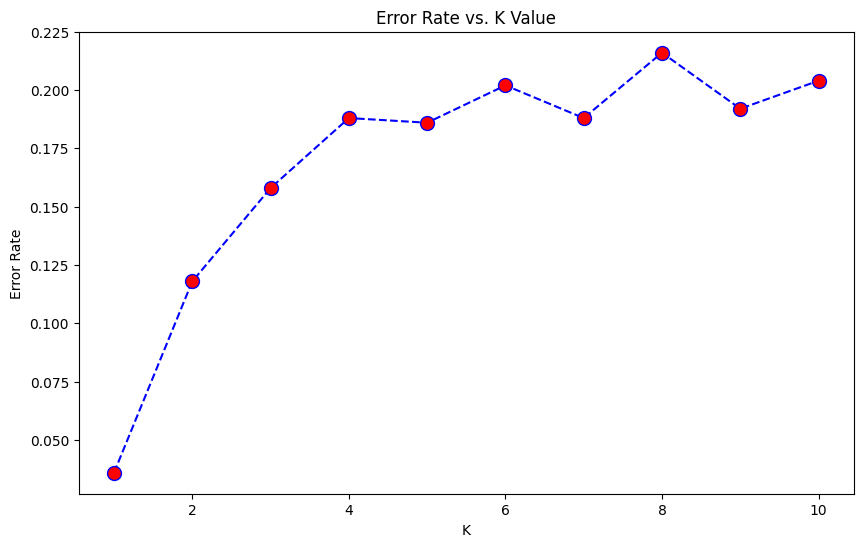

In [22]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [23]:
## This is reference code donot run this on current dataset.
## Error calculation for regression task
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_val = [] #create list to store rmse values for different k
for K in range(1,20):

    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.18973665961010275
RMSE value for k=  2 is: 0.25787593916455254
RMSE value for k=  3 is: 0.3141125063837266
RMSE value for k=  4 is: 0.3389321466016465
RMSE value for k=  5 is: 0.3553026878592393
RMSE value for k=  6 is: 0.36377648815355473
RMSE value for k=  7 is: 0.3710437567022994
RMSE value for k=  8 is: 0.36988173785684525
RMSE value for k=  9 is: 0.37218076054320504
RMSE value for k=  10 is: 0.37309516212355265
RMSE value for k=  11 is: 0.3707040431439962
RMSE value for k=  12 is: 0.3684426685388108
RMSE value for k=  13 is: 0.36401768602589213
RMSE value for k=  14 is: 0.3625730046121324
RMSE value for k=  15 is: 0.36149074062215697
RMSE value for k=  16 is: 0.3634792807024907
RMSE value for k=  17 is: 0.3647153698955698
RMSE value for k=  18 is: 0.3653849652619907
RMSE value for k=  19 is: 0.3659087272475204


In [24]:
# let's fit the data into KNN model and see how well it performs:
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
# Predict
y_pred = knn1.predict(X_test)

In [26]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.814


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       320
           1       0.77      0.69      0.73       180

    accuracy                           0.81       500
   macro avg       0.80      0.79      0.79       500
weighted avg       0.81      0.81      0.81       500



In [28]:
recall1=recall_score(y_test,y_pred)
recall1

0.6944444444444444

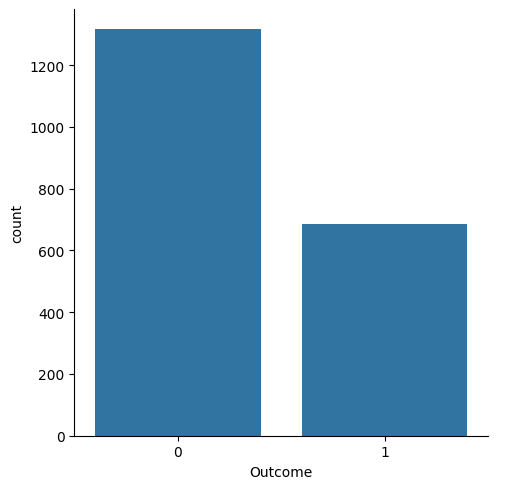

In [29]:
## checking the balance of traget
sns.catplot(x='Outcome',data=data,kind='count') # Imbalanced dataset

In [30]:
data.Outcome.value_counts()

,count
Outcome,
0,1316
1,684


In [31]:
df=sns.load_dataset('iris')

In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


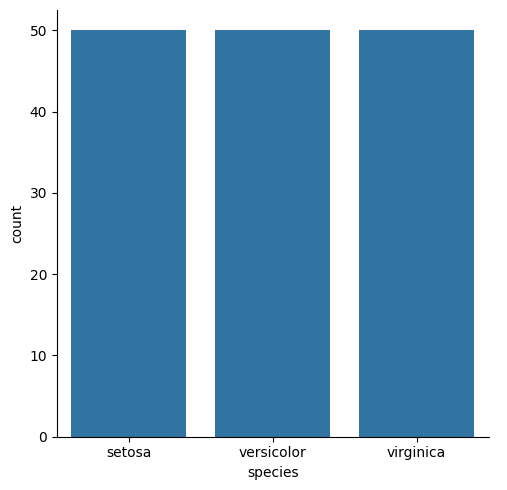

In [33]:
sns.catplot(x='species',data=df,kind='count') # Balanced dataset

In [34]:
df.species.value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


### Balancing the data-SMOTE

Training a machine learning model on an imbalanced dataset can introduce unique challenges to the learning problem. Imbalanced data typically refers to a classification problem where the number of observations per class is not equally distributed; often you'll have a large amount of data/observations for one class (referred to as the majority class), and much fewer observations for one or more other classes (referred to as the minority classes). For example, suppose you're building a classifier to classify a credit card transaction a fraudulent or authentic - you'll likely have 10,000 authentic transactions for every 1 fraudulent transaction, that's quite an imbalance!

### The imbalance to the class distribution in an imbalanced classification predictive modeling problem may have many causes.

There are perhaps two main groups of causes for the imbalance we may want to consider; they are data sampling and properties of the domain.

It is possible that the imbalance in the examples across the classes was caused by the way the examples were collected or sampled from the problem domain. This might involve biases introduced during data collection, and errors made during data collection.

Biased Sampling.
Measurement Errors.
For example, perhaps examples were collected from a narrow geographical region, or slice of time, and the distribution of classes may be quite different or perhaps even collected in a different way.

Errors may have been made when collecting the observations. One type of error might have been applying the wrong class labels to many examples. Alternately, the processes or systems from which examples were collected may have been damaged or impaired to cause the imbala

Imbalance can be handled in dataset by apply certain techniques like

1)OverSampling 2)Undersampling

## SMOTE

Synthetic Minority Over-sampling Technique (SMOTE) is a technique that generates new observations by interpolating between observations in the original dataset.
Interpolation is done with the help of KNN alogrith

In [35]:
!pip install imblearn

# After installing library restart the kernel.

In [36]:
#!pip install delayed

In [37]:
##conda install -c glemaitre imbalanced-learn -- on command prompt

In [42]:
conda install --user glemaitre imbalanced-learn

ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [39]:
!pip install -U imbalanced-learn

In [40]:
# Apply SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() ## object creation

In [ ]:
## Do not SMOTE the testing data.Because when the model is on production,
#the data may or may not be balanced one.

In [41]:
y_train.value_counts()

,count
Outcome,
0,996
1,504


In [43]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),
                                                  y_train)

In [44]:
y=np.array(y_train_smote)

In [45]:
y

array([0, 0, 0, ..., 1, 1, 1])

<Axes: ylabel='count'>

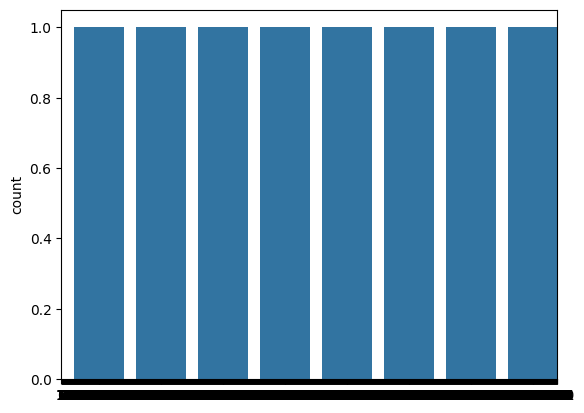

In [46]:
sns.countplot(y_train_smote)

<Axes: ylabel='count'>

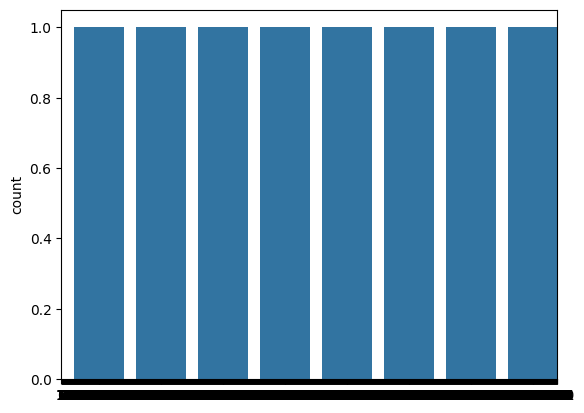

In [47]:
sns.countplot(y)

In [48]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_train_smote))

Actual Classes Counter({0: 996, 1: 504})
SMOTE Classes Counter({0: 996, 1: 996})


In [49]:

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [50]:
# Predict the output for X_test
y_pred = knn2.predict(X_test)

In [51]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.83


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       320
           1       0.71      0.88      0.79       180

    accuracy                           0.83       500
   macro avg       0.82      0.84      0.82       500
weighted avg       0.85      0.83      0.83       500

